# Análise explóratoria dos dados



## Imports 

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Criando o df com as companhias de taxi e a a quantidade de viagens
df1 = pd.read_csv('project_sql_result_01.csv')
df1

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
# Criando o df com o bairro de destino e a quantidade média de viagens em um determinado período de tempo.
df2 = pd.read_csv('project_sql_result_04.csv')
df2

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [4]:
# Criando um df com o horario da coleta
df3 = pd.read_csv('project_sql_result_07.csv')
df3

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


## Tratamento e verificação de dados

In [5]:
# DF1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df1.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [9]:
# DF2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
df2['average_trips'] = df2['average_trips'].astype(int)

print(df2)

   dropoff_location_name  average_trips
0                   Loop          10727
1            River North           9523
2          Streeterville           6664
3              West Loop           5163
4                 O'Hare           2546
..                   ...            ...
89       Mount Greenwood              3
90             Hegewisch              3
91              Burnside              2
92             East Side              1
93             Riverdale              1

[94 rows x 2 columns]


In [11]:
df2.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [12]:
df2.duplicated().sum()

0

In [13]:
df2.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


Decidi remover as duplicatas para não correr o risco de enviezar os dados.

In [14]:
# DF3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [15]:
df3.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [16]:
df3.duplicated().sum()

197

In [17]:
df3.drop_duplicates(inplace=True)
df3.duplicated().sum()

0

In [18]:
df3['duration_seconds'] = df3['duration_seconds'].astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            871 non-null    object
 1   weather_conditions  871 non-null    object
 2   duration_seconds    871 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 23.8+ KB


In [19]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 23.8+ KB


In [20]:
df3.describe()

,start_ts,duration_seconds
count,871,871.000000
mean,2017-11-11 20:10:53.042479872,2096.308840
min,2017-11-04 00:00:00,0.000000
25%,2017-11-04 15:00:00,1440.000000
50%,2017-11-11 10:00:00,2015.000000
75%,2017-11-18 07:00:00,2584.000000
max,2017-11-25 23:00:00,7440.000000
std,NaN,782.274717


Observamos nesta etapa que os DataFrames não apresentam valores faltantes, o que é positivo. No entanto, o DF3 possui valores ausentes e tanto o DF2 quanto o DF3 possuem tipos de dados inadequados.

Minha decisão foi remover as duplicatas e modificar o tipo das colunas conforme julguei necessário.

## Graficos


### Companhias  de taxi

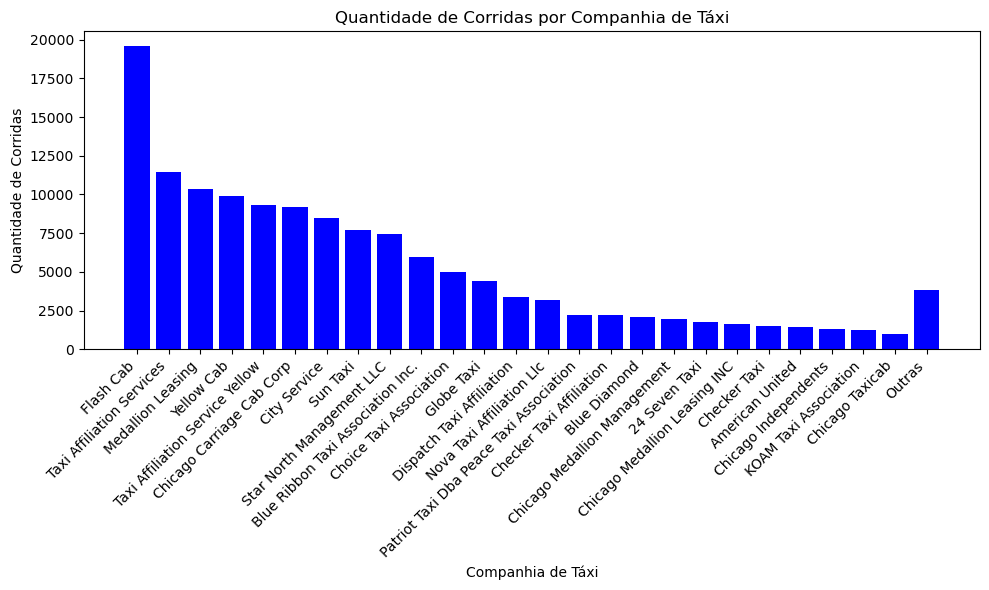

In [21]:
# Definir um limite para a quantidade mínima de viagens para uma companhia ser considerada relevante
min_trips_threshold = 1000

# Filtrar as companhias que têm mais do que o limite mínimo de viagens
df_relevant_companies = df1[df1['trips_amount'] >= min_trips_threshold]

# Calcular o total de viagens das companhias menos frequentes
total_less_frequent = df1[df1['trips_amount'] < min_trips_threshold]['trips_amount'].sum()

# Criar uma nova linha para representar as companhias menos frequentes
new_row = pd.DataFrame({'company_name': ['Outras'], 'trips_amount': [total_less_frequent]})
df_relevant_companies = pd.concat([df_relevant_companies, new_row], ignore_index=True)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Tamanho do gráfico
plt.bar(df_relevant_companies['company_name'], df_relevant_companies['trips_amount'], color='blue')  # Tipo de gráfico e cor das barras
plt.title('Quantidade de Corridas por Companhia de Táxi')  # Título do gráfico
plt.xlabel('Companhia de Táxi')  # Rótulo do eixo x
plt.ylabel('Quantidade de Corridas')  # Rótulo do eixo y
plt.xticks(rotation=45, ha='right')  # Rotação e alinhamento dos rótulos no eixo x
plt.tight_layout()  # Ajuste de layout
plt.show()  # Mostrar o gráfico

- Observamos que a companhia Flash Cab possui muito mais viagens do que as demais companhias, chegando a quase o dobro de viagens que a segunda companhia com mais viagens. 


- A barra 'Outras' no gráfico representa o agrupamento de todas as companhias com menos de 1000 viagens. Dedici junta-las para melhor vizualização do gráfico.

### Bairros

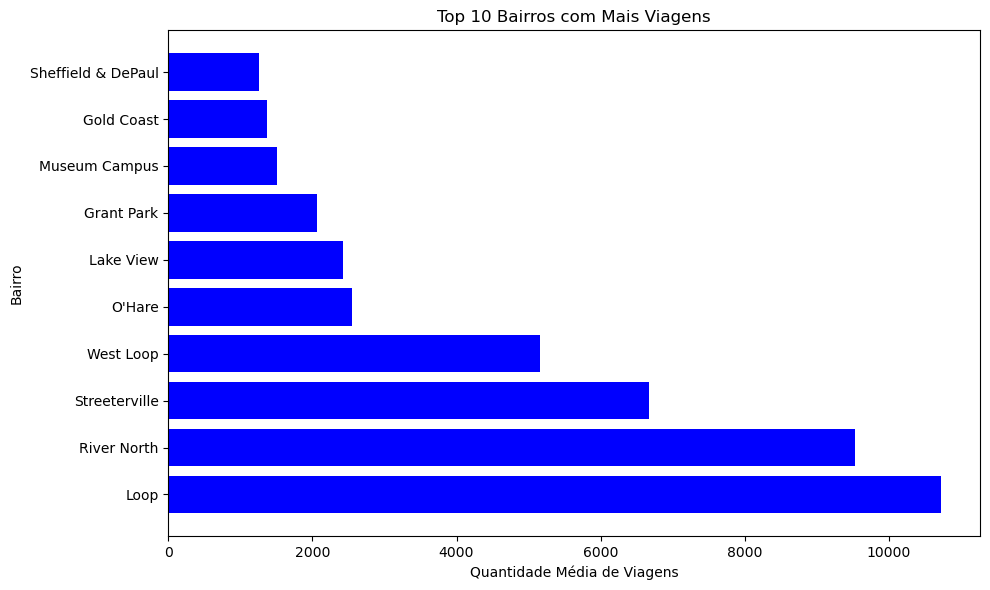

In [22]:
# Ordenar o DataFrame pelos 10 bairros com mais viagens
top_10_bairros = df2.sort_values(by='average_trips', ascending=False).head(10)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))  # Tamanho do gráfico
plt.barh(top_10_bairros['dropoff_location_name'], top_10_bairros['average_trips'], color='blue')  # Tipo de gráfico e cor das barras
plt.title('Top 10 Bairros com Mais Viagens')  # Título do gráfico
plt.xlabel('Quantidade Média de Viagens')  # Rótulo do eixo x
plt.ylabel('Bairro')  # Rótulo do eixo y
plt.tight_layout()  # Ajuste de layout
plt.show()  # Mostrar o gráfico

- Observamos que dos 10 bairros com mais viagens, quatro deles se destacam, sendo que o quinto bairro tem menos da metade de viagens do sexto bairro mais visitado



## Teste de hipoteses

In [23]:
# Filtrar as linhas onde a data é 4, 11, 18 ou 25 de novembro
datas_interessantes = ['2017-11-04', '2017-11-11', '2017-11-18', '2017-11-25']
df_filtrado = df3[df3['start_ts'].dt.date.astype(str).isin(datas_interessantes)]

df_filtrado

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700
1061,2017-11-18 16:00:00,Bad,2186
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318


Com o filtro acima temos a certeza de que todos os dados foram coletados em um sábado.

In [24]:
# Separar as durações de viagens em sábados chuvosos e outros dias
duracoes_chuvosos = df3[df3['weather_conditions'] == 'Bad']['duration_seconds']
duracoes_outros = df3[df3['weather_conditions'] == 'Good']['duration_seconds']

# Definir o nível de significância (alfa)
alfa = 0.05

# Realizar o teste t para amostras independentes
t_statistic, p_value = stats.ttest_ind(duracoes_chuvosos, duracoes_outros)

# Comparar o valor-p com o nível de significância (alfa)
if p_value < alfa:
    print("Rejeitamos a hipótese nula.")
    print("Há evidências estatísticas de que a duração média das viagens difere entre sábados chuvosos e outros dias.")
else:
    print("Não rejeitamos a hipótese nula.")
    print("Não há evidências estatísticas suficientes para afirmar que há diferença na duração média das viagens.")

Rejeitamos a hipótese nula.
Há evidências estatísticas de que a duração média das viagens difere entre sábados chuvosos e outros dias.


Na hipótese nula (H0), estamos assumindo que não há diferença significativa na duração média das viagens entre sábados chuvosos e outros dias. A hipótese alternativa (H1) sugere que há uma diferença significativa na duração média das viagens entre esses dois grupos.

O objetivo do teste de hipótese é coletar evidências estatísticas para decidir se rejeitamos a hipótese nula a favor da hipótese alternativa ou não. O resultado do teste, comparado ao nível de significância (alfa), nos ajudará a tomar essa decisão. Se o valor-p for menor do que o nível de significância, podemos rejeitar a hipótese nula e concluir que há evidências de uma diferença significativa nas durações médias das viagens. Caso contrário, não teremos evidências suficientes para fazer essa conclusão.

O critério utilizado para testar a hipótese é o teste t para amostras independentes. Esse teste é apropriado quando queremos comparar as médias de duas amostras independentes para determinar se há uma diferença significativa entre elas. Nesse caso, estamos comparando as médias das durações das viagens nos sábados chuvosos e em outros dias.

O teste t para amostras independentes é adequado para essa situação porque:

Amostras Independentes: As durações das viagens nos sábados chuvosos e em outros dias são independentes umas das outras, já que pertencem a diferentes grupos de condições climáticas.

Distribuição Normal (Assunção): O teste t assume que as populações subjacentes das duas amostras são aproximadamente distribuídas de forma normal. Isso é razoável em muitos cenários do mundo real, especialmente com amostras grandes.

Variância Igual (Assunção): O teste t também assume que as variâncias nas duas populações são aproximadamente iguais. No entanto, o teste é relativamente robusto a essa suposição, especialmente com amostras de tamanho semelhante.

O teste t calculará uma estatística de teste que é usada para calcular um valor-p. O valor-p é a probabilidade de observar a diferença nas médias das durações das viagens, considerando que a hipótese nula é verdadeira (ou seja, que não há diferença real). Se o valor-p for menor do que o nível de significância (alfa) que definimos, rejeitamos a hipótese nula, indicando que há evidências estatísticas de uma diferença significativa nas durações médias das viagens entre os grupos.

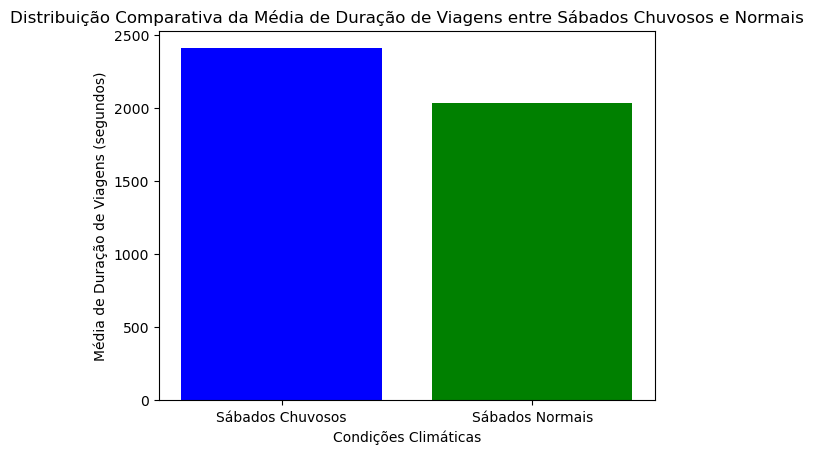

In [25]:
# Filtrar sábados chuvosos
sabados_chuvosos = df3[(df3['start_ts'].dt.dayofweek == 5) & (df3['weather_conditions'] == 'Bad')]

# Filtrar sábados normais
sabados_normais = df3[(df3['start_ts'].dt.dayofweek == 5) & (df3['weather_conditions'] == 'Good')]

# Calcular a média de duração de viagens para sábados chuvosos e normais
media_duracao_chuvosos = sabados_chuvosos['duration_seconds'].mean()
media_duracao_normais = sabados_normais['duration_seconds'].mean()

# Criar um gráfico de barras comparativo
labels = ['Sábados Chuvosos', 'Sábados Normais']
media_duracoes = [media_duracao_chuvosos, media_duracao_normais]

plt.bar(labels, media_duracoes, color=['blue', 'green'])
plt.xlabel('Condições Climáticas')
plt.ylabel('Média de Duração de Viagens (segundos)')
plt.title('Distribuição Comparativa da Média de Duração de Viagens entre Sábados Chuvosos e Normais')
plt.show()

# Conclusão

Observamos que ocorre uma concentração das viagens totais realizadas em poucas empresas.

As 10 companhias que mais possuem viagens são:

- Loop Taxi
- River North Taxi
- Streeterville Taxi
- West Loop Taxi
- O'Hare Taxi
- Lakeview Taxi
- Lincoln Park Taxi
- Gold Coast Taxi
- Burnside Elite
- South Shore Taxi

Observamos que a companhia Flash Cab possui muito mais viagens do que as demais companhias, chegando a quase o dobro de viagens que a segunda companhia com mais viagens. 

Os 10 bairros com mais destinos são:

- Loop
- River North
- Streeterville
- West Loop
- O'Hare
- Lakeview
- Lincoln Park
- Gold Coast
- Pullman
- Near West Side

Observamos que dos 10 bairros com mais viagens, quatro deles se destacam, sendo que o quinto bairro tem menos da metade de viagens do sexto bairro mais visitado


E com o teste de hipotese concluimos que a duração média das viagens difere entre sábados chuvosos e outros dias.

